In [151]:
# Pokemon Data Prep and Analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, scale

In [152]:
pokemon_df = pd.read_csv("pokemon.csv")
pokemon_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [153]:
pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [154]:
is_legendary = pokemon_df["is_legendary"].values
is_legendary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [155]:
relevant_features = ["pokedex_number", "attack", "defense", "hp", "sp_attack", 
                     "sp_defense", "speed", "base_total", "capture_rate", "classfication",
                    "experience_growth", "height_m", "type1", "type2", "weight_kg", "generation", "name"]

In [156]:
pokemon2_df = pokemon_df[relevant_features]
pokemon2_df = pokemon2_df.drop(pokemon2_df.index[773])

In [157]:
pokemon2_df = pokemon2_df.drop(pokemon2_df[pokemon2_df["height_m"].isna()].index)
pokemon2_df.head()

,pokedex_number,attack,defense,hp,sp_attack,sp_defense,speed,base_total,capture_rate,classfication,experience_growth,height_m,type1,type2,weight_kg,generation,name
0,1,49,49,45,65,65,45,318,45,Seed Pokémon,1059860,0.7,grass,poison,6.9,1,Bulbasaur
1,2,62,63,60,80,80,60,405,45,Seed Pokémon,1059860,1.0,grass,poison,13.0,1,Ivysaur
2,3,100,123,80,122,120,80,625,45,Seed Pokémon,1059860,2.0,grass,poison,100.0,1,Venusaur
3,4,52,43,39,60,50,65,309,45,Lizard Pokémon,1059860,0.6,fire,NaN,8.5,1,Charmander
4,5,64,58,58,80,65,80,405,45,Flame Pokémon,1059860,1.1,fire,NaN,19.0,1,Charmeleon


In [158]:
pokemon2_df.index = [i for i in range(0,pokemon2_df.shape[0])]
le = LabelEncoder()

In [159]:
pokemon2_df.loc[pokemon2_df["type2"].isna(), "type2"] = pokemon2_df.loc[pokemon2_df["type2"].isna(), "type1"]
pokemon2_df.head()

,pokedex_number,attack,defense,hp,sp_attack,sp_defense,speed,base_total,capture_rate,classfication,experience_growth,height_m,type1,type2,weight_kg,generation,name
0,1,49,49,45,65,65,45,318,45,Seed Pokémon,1059860,0.7,grass,poison,6.9,1,Bulbasaur
1,2,62,63,60,80,80,60,405,45,Seed Pokémon,1059860,1.0,grass,poison,13.0,1,Ivysaur
2,3,100,123,80,122,120,80,625,45,Seed Pokémon,1059860,2.0,grass,poison,100.0,1,Venusaur
3,4,52,43,39,60,50,65,309,45,Lizard Pokémon,1059860,0.6,fire,fire,8.5,1,Charmander
4,5,64,58,58,80,65,80,405,45,Flame Pokémon,1059860,1.1,fire,fire,19.0,1,Charmeleon


In [160]:
categorical = ["classfication", "type1", "type2"]
pokemon2_df[categorical] = pokemon2_df[categorical].apply(
    lambda col: le.fit_transform(col))

In [161]:
pokemon2_df.head()

,pokedex_number,attack,defense,hp,sp_attack,sp_defense,speed,base_total,capture_rate,classfication,experience_growth,height_m,type1,type2,weight_kg,generation,name
0,1,49,49,45,65,65,45,318,45,440,1059860,0.7,9,13,6.9,1,Bulbasaur
1,2,62,63,60,80,80,60,405,45,440,1059860,1.0,9,13,13.0,1,Ivysaur
2,3,100,123,80,122,120,80,625,45,440,1059860,2.0,9,13,100.0,1,Venusaur
3,4,52,43,39,60,50,65,309,45,295,1059860,0.6,6,6,8.5,1,Charmander
4,5,64,58,58,80,65,80,405,45,183,1059860,1.1,6,6,19.0,1,Charmeleon


In [162]:
pokemon_mat = pokemon2_df.values
pokemon_mat[:,1:-1] = scale(pokemon_mat[:,1:-1])
pokemon_mat

array([[1, -0.8898473594431903, -0.7797821839917701, ...,
        -0.49844055223493294, -1.4411393181656538, 'Bulbasaur'],
       [2, -0.4862938809891471, -0.3252734330341972, ...,
        -0.4426574357886123, -1.4411393181656538, 'Ivysaur'],
       [3, 0.6933239791072867, 1.6226212139268295, ...,
        0.3529378315605513, -1.4411393181656538, 'Venusaur'],
       ...,
       [799, 0.7243665543729824, -0.649922540861035, ...,
        7.559019103642631, 1.713459376415852, 'Guzzlord'],
       [800, 0.9106220059671561, 0.9083931767077863, ...,
        1.5417583459903361, 1.713459376415852, 'Necrozma'],
       [801, 0.5381111027788086, 1.3629019276653591, ...,
        0.17461475439608362, 1.713459376415852, 'Magearna']], dtype=object)

In [163]:
pca = PCA(n_components=2)

In [164]:
pca.fit(pokemon_mat[:,1:-1])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [165]:
pca.explained_variance_ratio_

array([0.33424968, 0.10972892])

In [166]:
pokemon_pca = pca.fit_transform(pokemon_mat[:,1:-1])
pokemon_pca

array([[-1.57864347, -0.75717169],
       [-0.32014247, -0.70300889],
       [ 3.11833317, -0.98596995],
       ...,
       [ 5.99321356,  0.86051401],
       [ 3.73621615, -0.80427307],
       [ 3.10366627,  0.44352779]])

In [169]:
kmeans = KMeans(n_clusters = 3).fit(pokemon_mat[:,1:-1])
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2,

In [183]:
for i in range(kmeans.labels_.shape[0]):
    if kmeans.labels_[i]==0:
        print(pokemon2_df.loc[i,"name"])

Onix
Gyarados
Lapras
Snorlax
Dragonite
Mewtwo
Steelix
Entei
Suicune
Tyranitar
Lugia
Ho-Oh
Slaking
Hariyama
Aggron
Wailord
Milotic
Salamence
Metagross
Regirock
Regice
Registeel
Latios
Kyogre
Groudon
Rayquaza
Torterra
Garchomp
Hippowdon
Abomasnow
Rhyperior
Mamoswine
Probopass
Dialga
Palkia
Heatran
Regigigas
Giratina
Arceus
Gigalith
Beartic
Golurk
Cobalion
Terrakion
Virizion
Reshiram
Zekrom
Kyurem
Tyrantrum
Aurorus
Goodra
Avalugg
Xerneas
Yveltal
Zygarde
Volcanion
Mudsdale
Dhelmise
Cosmoem
Solgaleo
Lunala
Buzzwole
Xurkitree
Celesteela
Guzzlord
Necrozma


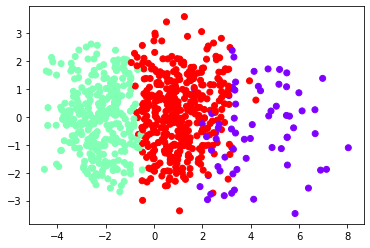

In [173]:
plt.scatter(pokemon_pca[:,0], pokemon_pca[:,1], c=kmeans.labels_, cmap="rainbow")

In [185]:
pokemon2_df["PC1"] = pokemon_pca[:,0]
pokemon2_df["PC2"] = pokemon_pca[:,1]
pokemon2_df["Cluster"] = kmeans.labels_
pokemon2_df["Cluster Name"] = ""
pokemon2_df.loc[pokemon2_df["Cluster"] == 0, "Cluster Name"] = "Legendary"
pokemon2_df.loc[pokemon2_df["Cluster"] == 1, "Cluster Name"] = "Baby"
pokemon2_df.loc[pokemon2_df["Cluster"] == 2, "Cluster Name"] = "Fully Evolved"
pokemon2_df.to_csv("pokemon_processed.csv")

In [139]:
import nvd3
from IPython.display import display, HTML
nvd3.ipynb.initialize_javascript(use_remote=True)


chart = nvd3.scatterChart(name='scatterChart', height=400, width=400)
x_data = pokemon_pca[:,0]
y_data = pokemon_pca[:,1]
kwargs = {"shape": "circle", "size":10, "fill":kmeans.labels_}
chart.add_serie(x=x_data, y=y_data, **kwargs)
chart.buildhtml()
chart

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [186]:
dir(chart)

['CHART_FILENAME',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_slugify_name',
 'add_chart_extras',
 'add_serie',
 'assets_directory',
 'axislist',
 'buildcontainer',
 'buildcontent',
 'buildhtml',
 'buildhtmlheader',
 'buildjschart',
 'chart_attr',
 'charttooltip',
 'charttooltip_dateformat',
 'color_category',
 'color_list',
 'container',
 'containerheader',
 'content',
 'count',
 'create_x_axis',
 'create_y_axis',
 'custom_tooltip_flag',
 'date_flag',
 'date_format',
 'display_container',
 'extras',
 'focus_enable',
 'header_css',
 'header_js',
 'height',
 'htmlcontent',
 'htmlheader',
 'jquery_on_ready',
 'jschart',
 'margin_bottom',
 'margin_left',
 'margin_r